In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [30]:
inputImage = cv2.imread('line0.png')
grayImage= cv2.cvtColor(inputImage, cv2.COLOR_BGR2GRAY)
GaussianFilter= cv2.GaussianBlur(grayImage, (5,5), 0)
_, binarizedImage = cv2.threshold(GaussianFilter, 127, 255, cv2.THRESH_BINARY)


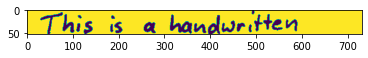

In [31]:
plt.imshow(binarizedImage)

In [32]:
binarizedImage[binarizedImage == 0] = 1
binarizedImage[binarizedImage == 255] = 0

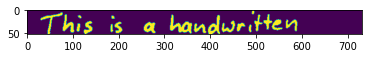

In [33]:
plt.imshow(binarizedImage)

In [34]:
vertical_projection = np.sum(binarizedImage, axis=0);
#print(horizontal_projection);

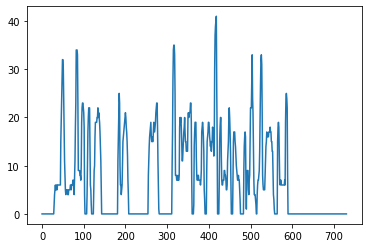

In [35]:
plt.plot(vertical_projection)
plt.show()

In [36]:
height, width = binarizedImage.shape
print('width : ', width)
print('height : ', height)

width :  731
height :  52


In [37]:
blankImage = np.zeros((height, width, 3), np.uint8)

In [38]:
for row in range(width):
    print(int(vertical_projection[row]))
    #cv2.line(blankImage, (0,row), (int(horizontal_projection[row]*width/height),row), (255,255,255), 1)
    cv2.line(blankImage, (row,height-int(vertical_projection[row]*width/height)), (row,0), (255,255,255), 1)
    #cv2.rectangle(inputImage, (0,row), (int(horizontal_projection[row]*width),row), (0, 255, 0), 1)
    #roi=inputImage[row:row,0:int(horizontal_projection[row]*width/height)]
    
    

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
4
5
6
5
5
6
5
6
6
6
6
6
6
6
6
15
19
22
27
32
32
30
24
18
11
8
5
4
5
5
5
5
4
4
5
5
5
5
6
6
5
6
6
6
7
7
6
4
8
11
18
23
34
34
34
33
23
9
9
9
9
8
8
7
10
19
22
23
23
22
21
18
4
0
0
0
0
0
4
10
17
20
22
22
22
14
6
5
2
0
0
0
0
0
5
9
10
16
19
19
19
19
20
20
22
20
21
20
19
17
14
11
5
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
11
16
21
25
23
10
6
6
4
5
6
11
15
16
17
18
19
20
21
20
18
17
15
12
7
4
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
8
11
14
16
17
18
19
16
15
16
15
15
17
19
18
17
18
19
21
22
23
23
18
11
6
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
10
17
28
34
35
35
33
25
8
8
8
7
7
7
8
7
7
8
18
20
19
20
18
15
11
11
13
15
17
18
20
17
15
15
13
13
13
13
20
21
20
21
21
21
23
23
19
7
0
0
0
0
2
14
17
19
19
19
12
8
7
7
8
8
7
7
7
7
6
7
9
17
18
19
18
16
13
5
3
0
0
0
0
9
15
16
17
19
19
18
16
15
14
15
13
15
15
18
17
15
12
13
30
37
39
40
41

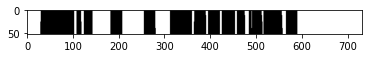

In [39]:
plt.imshow(blankImage)

In [40]:
def veriferavant(row):
    print(row)
    n=0
    i=1
    while vertical_projection[row-i]==0:
        print(row-i)
        n=n+1
        i=i+1
        if n > 10:
            break
    print(n)
    return n
def veriferarriere(row):
    n=0
    i=1
    while vertical_projection[row+i]==0:
        n=n+1
        i=i+1
        if n > 10:
            break
    return n   

In [41]:
start=0
end=0
j=0
for row in range(width):
    #print(horizontal_projection[row])
    #print(horizontal_projection[row+1])
    if vertical_projection[row-1]==0 and vertical_projection[row]!=0 and(veriferavant(row-1)>10):
        
        start=row
        print("s",start)
        print(vertical_projection[row])
    if vertical_projection[row-1]!=0 and vertical_projection[row]==0 and vertical_projection[row+1]==0 and veriferarriere(row+1)>10 :
            end=row-1
            
            print("e",end)
            print(vertical_projection[row-1])
            roi=inputImage[0:height,start:end]
            cv2.imwrite("word"+str(j)+".png",roi)
            j=j+1
            #plt.imshow(roi)
            #break
    #roi=image[y:y+h,x:x+w]
    #print(start)
    #print(end)
            
    
        
    
        

28
27
26
25
24
23
22
21
20
19
18
17
11
s 29
2
107
106
105
104
103
4
123
122
121
120
119
4
e 142
5
181
180
179
178
177
176
175
174
173
172
171
170
11
s 182
11
e 207
4
254
253
252
251
250
249
248
247
246
245
244
243
11
s 255
8
e 280
1
311
310
309
308
307
306
305
304
303
302
301
300
11
s 312
10
363
362
361
360
3
394
393
392
391
3
424
423
422
421
3
457
456
455
454
3
483
482
481
480
479
478
477
476
7
515
514
1
564
563
562
561
560
559
558
6
e 589
8


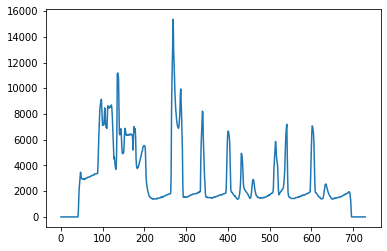

In [34]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

img = cv2.imread("/home/yasmine/Téléchargements/word.png", 0)
img = 255-img

img_row_sum = np.sum(img,axis=0).tolist()

plt.plot(img_row_sum)
plt.show()

In [35]:
print(img_row_sum )

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 608, 1691, 2328, 2742, 3125, 3475, 3254, 3030, 2966, 2966, 2966, 2934, 2966, 2935, 2966, 2903, 2966, 2997, 2998, 2997, 3030, 3061, 3062, 3093, 3093, 3093, 3093, 3125, 3125, 3157, 3189, 3189, 3221, 3221, 3220, 3253, 3253, 3253, 3316, 3349, 3349, 3349, 3349, 3348, 3379, 3379, 3380, 4244, 5423, 6474, 7398, 8196, 8642, 8770, 9027, 9151, 8291, 7526, 7112, 7145, 7175, 7176, 7940, 8479, 8227, 7207, 6984, 6985, 6889, 7493, 8545, 8644, 8451, 8452, 8483, 8579, 8547, 8515, 8643, 8707, 8451, 7878, 7081, 6253, 5359, 4498, 4655, 4304, 3985, 3763, 3699, 4370, 6383, 11128, 11189, 11125, 10714, 8834, 6539, 6379, 6474, 6826, 6855, 6090, 5389, 4975, 4912, 4975, 4975, 5389, 6122, 6887, 6858, 6601, 6379, 6379, 6411, 6347, 6379, 6378, 6347, 6379, 6442, 6412, 6379, 6442, 6442, 6411, 6379, 6378, 5900, 5199, 6413, 7018, 6795, 6600, 6855, 6127, 4498, 3987, 3828, 3764, 3859, 3860, 3955, 

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  5.  8. 10. 11. 13. 10. 10. 10. 10. 10. 10.
 10.  9. 10.  9. 10. 11. 10. 11. 10. 11. 10. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 11. 11. 12. 11. 11. 11. 12. 11. 11. 11. 11. 12. 13. 13. 12. 12.
 17. 22. 26. 28. 30. 30. 29. 33. 29. 26. 24. 23. 25. 24. 28. 33. 29. 25.
 24. 23. 23. 27. 31. 28. 29. 28. 29. 29. 29. 29. 29. 29. 29. 26. 23. 19.
 17. 14. 17. 16. 15. 13. 13. 14. 17. 40. 43. 43. 38. 30. 21. 21. 22. 22.
 25. 22. 19. 17. 16. 17. 17. 19. 22. 25. 22. 23. 21. 21. 21. 21. 21. 22.
 21. 21. 22. 20. 21. 22. 22. 21. 21. 22. 20. 17. 19. 22. 21. 24. 25. 17.
 14. 13. 12. 12. 13. 12. 13. 13. 14. 14. 16. 15. 15. 17. 17. 18. 18. 19.
 20. 20. 20. 20. 19. 13. 11.  9.  8.  8.  6.  6.  6.  5.  5.  5.  5.  5.
  5.  5.  5.  4.  4.  4.  5.  5.  5.  5.  5.  5.  5.  4.  4.  5.  5.  5.
  4.  5.  5.  4.  5.  5.  5.  5.  6.  5.  6.  5.  6

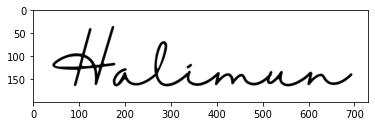

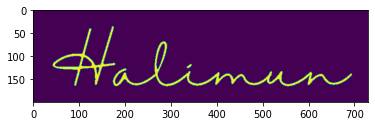

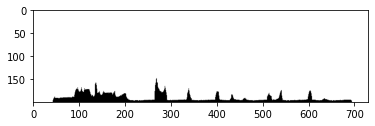

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("/home/yasmine/Téléchargements/word.png")
plt.imshow( image)

height, width, _ = image.shape

gray_scale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, threshold_image = cv2.threshold(gray_scale, 0, 255, cv2.THRESH_BINARY_INV)
plt.figure()
plt.imshow(threshold_image)

vertical_pixel_sum = np.sum(threshold_image, axis=0)
myprojection = vertical_pixel_sum /255
print(myprojection)
blankImage = np.zeros_like(image)
for i, value in enumerate(myprojection):
    cv2.line(blankImage, (i, 0), (i, height-int(value)), (255, 255, 255), 1)
plt.figure()
plt.imshow(blankImage)



In [7]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(myprojection, height=5)
print(peaks)

[ 47  56  59  61  63  76  80  86  94  97 102 105 112 114 119 128 136 144
 153 155 161 164 167 171 175 178 184 190 199 225 232 235 242 244 246 248
 250 253 256 269 287 293 299 303 306 308 310 312 314 329 339 347 350 366
 372 375 377 379 382 401 415 418 433 455 460 462 469 481 492 494 496 498
 500 514 524 541 546 555 570 577 580 584 586 603 634 649 655 669 675 684]


In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
def horizontal(im):
    y_start = 0
    y_end = 0
    flag = False

    w,h = im.shape[:2]
    # Invert
    im = 255 - im
    # Calculate horizontal projection
    proj = np.sum(im,1) #summation xais of pixel
    print('Sum projection',proj)
    # Create output image same height as text, 500 px wide
    m = np.max(proj)
    mn = np.min(proj)
    print('MIN' ,mn)
    print('max projection' ,m)
    result = np.zeros((w,h))
    # Draw a line for each row
    print('width ',im.shape[0])
    print('higth' ,im.shape[1])
    spliting = calAvgPercentMin(mn)
    print('sp' ,spliting)
    stack = 0
    for row in range(im.shape[0]):
        cv2.line(result, (0,row), (int(proj[row]*w/m),row), (255,255,255), 1)
        if proj[row] > spliting:
            #cv2.line(result, (0,row), (int(proj[row]*w/m),row), (255,255,255), 3)
            if flag == False:
                y_start = row
                flag = True
            if stack >20:
                y_end = row
                stack = stack+1
            else:
                stack = 0
    # Save result
    #cv2.imshow(‘HorizontalProjection.png’, result)
    plt.imshow(result)
    #cv2.imshow(‘ori.png’, im)
    plt.figure()
    plt.imshow(im)
    #cv2.imwrite(‘Horizontal.png’,result)
    print('Start', y_start)
    print('End', y_end)

In [9]:
img=cv2.imread("/home/yasmine/Téléchargements/word.png")
horizontal(img)

Sum projection [[    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [    0     0     0]
 [   96    96    96]
 [  926   926   926]
 [ 1308  1308  1308]
 [ 1436  1436  1436]
 [ 1467  1467  1467]
 [ 2043  2043  2043]
 [ 2679  2679  2679]
 [ 2871  2871  2871]
 [ 2998  2998  2998]
 [ 2966  2966  2966]
 [ 2998  2998  2998]
 [ 2998  2998  2998]
 [ 2966  2966  2966

NameError: name 'calAvgPercentMin' is not defined